In [1]:
import numpy as np
from NeuralNetwork import runNeuralNetwork, evaluate_model
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import ParameterGrid

import matplotlib.pyplot as plt

## Hyperparameters tuning

In [4]:
# Try different number of hidden units, different weight/bias initializations, different learning rates, and
# discuss whether they affect the training/testing performace

best_acc = -999999
best_prec = -999999
best_rec = -999999
best_f1 = -999999
best_roc = -999999
best_params = {}
best_model = 0
# best parameters: {'hidden_size': 256, 'init_type': 'xavier_normal', 'learning_rate': 0.01}
parameters = {'hidden_size':[128, 256], 
              'learning_rate':[0.01, 0.1],
              'init_type':['xavier_uniform', 'xavier_normal']}

grid = ParameterGrid(parameters)

for params in grid:
    print(params)
    learning_rate = params['learning_rate']
    hidden_size = params['hidden_size']
    init_type = params['init_type']
    # hidden_size=128, learning_rate=0.001, init_type='xavier_uniform'
    # print('hello')
    train_losses, train_accuracies, val_losses, val_accuracies, model, train_loader, test_loader, criterion, num_classes = runNeuralNetwork(hidden_size, learning_rate, init_type)
    
    train_actuals, train_predictions, train_probabilities, train_model_loss = evaluate_model(model, train_loader, criterion)
    actuals_binarized = label_binarize(train_actuals, classes=range(num_classes))

    train_acc = accuracy_score(train_actuals, train_predictions)
    train_prec = precision_score(train_actuals, train_predictions, average='macro')
    train_rec = recall_score(train_actuals, train_predictions, average='macro')
    train_f1 = f1_score(train_actuals, train_predictions, average='macro')
    train_roc_score = roc_auc_score(actuals_binarized, train_probabilities, multi_class='ovr')

    print('train accuracy', train_acc)
    print('train precison', train_prec)
    print('train recall', train_rec)
    print('train f1', train_f1)
    print('train roc score', train_roc_score)

    print('--------------------------')

    test_actuals, test_predictions, test_probabilities, test_model_loss = evaluate_model(model, test_loader, criterion)
    actuals_binarized = label_binarize(test_actuals, classes=range(num_classes))

    test_acc = accuracy_score(test_actuals, test_predictions)
    test_prec = precision_score(test_actuals, test_predictions, average='macro')
    test_rec = recall_score(test_actuals, test_predictions, average='macro')
    test_f1 = f1_score(test_actuals, test_predictions, average='macro')
    test_roc_score = roc_auc_score(actuals_binarized, test_probabilities, multi_class='ovr')

    print('test accuracy', test_acc)
    print('test precison', test_prec)
    print('test recall', test_rec)
    print('test f1', test_f1)
    print('test roc score', test_roc_score)
    
    acc = np.mean(train_accuracies)
    if acc > best_acc:
        best_acc = acc
        best_model = model
        best_params = params

    
test_actuals, test_predictions, test_probabilities, test_model_loss = evaluate_model(best_model, test_loader, criterion)
actuals_binarized = label_binarize(test_actuals, classes=range(num_classes))

test_acc = accuracy_score(test_actuals, test_predictions)
test_prec = precision_score(test_actuals, test_predictions, average='macro')
test_rec = recall_score(test_actuals, test_predictions, average='macro')
test_f1 = f1_score(test_actuals, test_predictions, average='macro')

test_roc_score = roc_auc_score(actuals_binarized, test_probabilities, multi_class='ovr')

print('best parameters:', best_params)
print('test accuracy', test_acc)
print('test precison', test_prec)
print('test recall', test_rec)
print('test f1', test_f1)
print('test roc score', test_roc_score)
    

{'hidden_size': 128, 'init_type': 'xavier_uniform', 'learning_rate': 0.01}
mean val accuracy 0.9652
mean val roc score 0.9989285955704386
test accuracy 0.9707
test precison 0.9706178035713023
test recall 0.9705954762405495
test f1 0.9705033416278326
test roc score 0.9993532478069256
train accuracy 0.98442
train precison 0.9843287595611285
train recall 0.9845331715208936
train f1 0.9843680955012303
train roc score 0.9998157850011612
--------------------------
test accuracy 0.9707
test precison 0.9706178035713023
test recall 0.9705954762405495
test f1 0.9705033416278326
test roc score 0.9993532478069256
{'hidden_size': 128, 'init_type': 'xavier_uniform', 'learning_rate': 0.1}
mean val accuracy 0.09966
mean val roc score 0.5
test accuracy 0.098
test precison 0.0098
test recall 0.1
test f1 0.01785063752276867
test roc score 0.5
train accuracy 0.09864
train precison 0.009864000000000001
train recall 0.1
train f1 0.01795674652297386
train roc score 0.5
--------------------------
test accurac

## Error Analysis

Epoch [1/100],Loss:87.8244,Validation Loss:20.0848,Accuracy:0.96,Validation Accuracy:0.96
Epoch [2/100],Loss:56.2035,Validation Loss:16.1423,Accuracy:0.98,Validation Accuracy:0.97
Epoch [3/100],Loss:55.6397,Validation Loss:16.4475,Accuracy:0.98,Validation Accuracy:0.97
Epoch [4/100],Loss:54.7698,Validation Loss:18.4208,Accuracy:0.98,Validation Accuracy:0.97
Epoch [5/100],Loss:41.2498,Validation Loss:15.7079,Accuracy:0.98,Validation Accuracy:0.97
Epoch [6/100],Loss:40.9475,Validation Loss:15.8320,Accuracy:0.98,Validation Accuracy:0.97
Epoch [7/100],Loss:35.6460,Validation Loss:15.8914,Accuracy:0.98,Validation Accuracy:0.97
Epoch [8/100],Loss:28.4012,Validation Loss:14.7443,Accuracy:0.99,Validation Accuracy:0.97
Epoch [9/100],Loss:31.2990,Validation Loss:16.0296,Accuracy:0.99,Validation Accuracy:0.97
Epoch [10/100],Loss:26.5671,Validation Loss:15.9816,Accuracy:0.99,Validation Accuracy:0.97
Epoch [11/100],Loss:29.0538,Validation Loss:16.7172,Accuracy:0.99,Validation Accuracy:0.97
Epoch [1

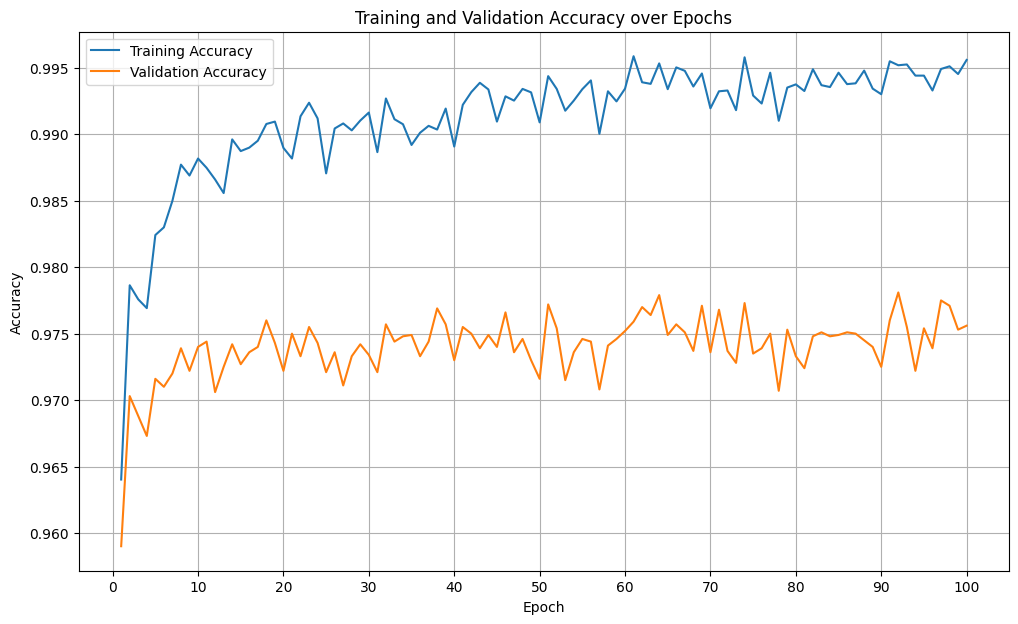

/u/epw9kz/academic/first_year/ML/project/notebooks/plots/nn_acc.png


<Figure size 640x480 with 0 Axes>

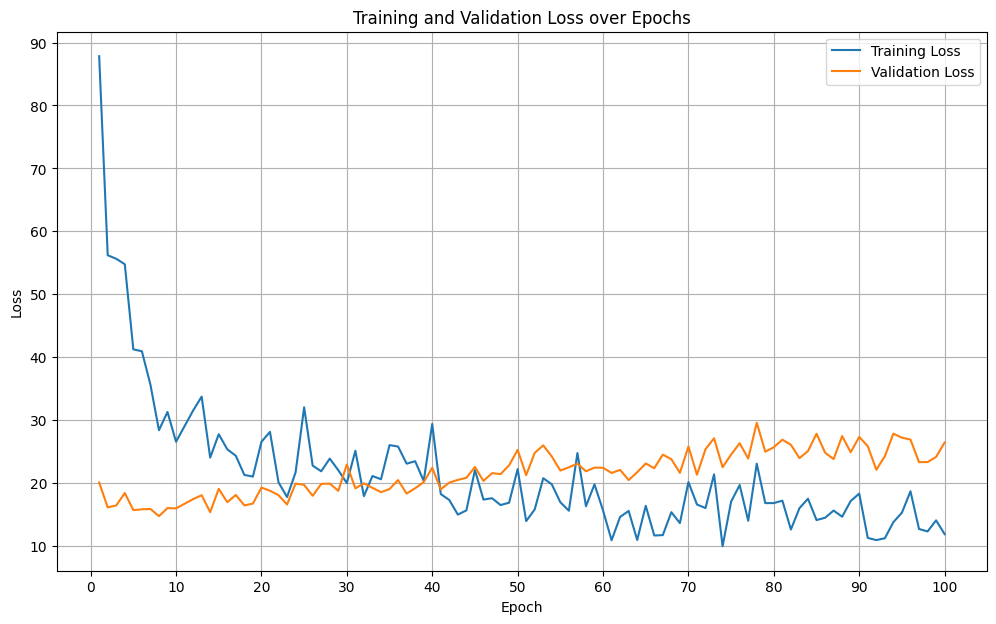

/u/epw9kz/academic/first_year/ML/project/notebooks/plots/nn_loss.png
done!


<Figure size 640x480 with 0 Axes>

In [2]:
# Try different number of hidden units, different weight/bias initializations, different learning rates, and
# discuss whether they affect the training/testing performace

learning_rate = 0.01
hidden_size = 256
init_type = 'xavier_normal'

train_losses, train_accuracies, val_losses, val_accuracies, model, train_loader, test_loader, criterion, num_classes = runNeuralNetwork(hidden_size, learning_rate, init_type)

print(len(train_accuracies))
# ------------------------plotting------------------------------
epochs = range(1, len(train_accuracies) + 1)

# Plotting with xticks after every 10 epochs
plt.figure(figsize=(12, 7))
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')

plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(0, len(epochs) + 1, 10))  # Setting xticks at intervals of 10
plt.legend()
plt.grid(True)
plt.show()

img_filename = '/u/epw9kz/academic/first_year/ML/project/notebooks/plots/nn_acc.png'
print(img_filename)
plt.savefig(img_filename, dpi=300, bbox_inches='tight')  

# --------------------------------------------------------
plt.figure(figsize=(12, 7))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')

plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, len(epochs) + 1, 10))  
plt.legend()
plt.grid(True)
plt.show()

img_filename = '/u/epw9kz/academic/first_year/ML/project/notebooks/plots/nn_loss.png'
print(img_filename)
plt.savefig(img_filename, dpi=300, bbox_inches='tight')  

print('done!')